假设我们掷骰子，想知道看到1的几率有多大，而不是看到另一个数字。 如果骰子是公平的，那么所有六个结果都有相同的可能发生， 因此我们可以说发生的概率为。
然而现实生活中，对于我们从工厂收到的真实骰子，我们需要检查它是否有瑕疵。 检查骰子的唯一方法是多次投掷并记录结果。 对于每个骰子，我们将观察到中的一个值。 对于每个值，一种自然的方法是将它出现的次数除以投掷的总次数， 即此事件（event）概率的估计值。 大数定律（law of large numbers）告诉我们： 随着投掷次数的增加，这个估计值会越来越接近真实的潜在概率。 让我们用代码试一试！

In [1]:
import torch
from torch.distributions import multinomial

在统计学中，我们把从概率分布中抽取样本的过程称为抽样（sampling）。 笼统来说，可以把分布（distribution）看作是对事件的概率分配， 稍后我们将给出的更正式定义。 将概率分配给一些离散选择的分布称为多项分布（multinomial distribution）。
为了抽取一个样本，即掷骰子，我们只需传入一个概率向量。 输出是另一个相同长度的向量：它在索引i处的值是采样结果中i出现的次数

In [2]:
fair_probs = torch.ones([6]) / 6
multinomial.Multinomial(1, fair_probs).sample()

tensor([0., 1., 0., 0., 0., 0.])

在估计一个骰子的公平性时，我们希望从同一分布中生成多个样本。 如果用Python的for循环来完成这个任务，速度会慢得惊人。 因此我们使用深度学习框架的函数同时抽取多个样本，得到我们想要的任意形状的独立样本数组。

In [3]:
multinomial.Multinomial(10, fair_probs).sample()

tensor([2., 3., 1., 3., 1., 0.])

现在我们知道如何对骰子进行采样，我们可以模拟1000次投掷。 然后，我们可以统计1000次投掷后，每个数字被投中了多少次。 具体来说，我们计算相对频率，以作为真实概率的估计。

In [4]:
# 将结果存储为32位浮点数以进行除法
counts = multinomial.Multinomial(1000, fair_probs).sample()
counts / 1000  # 相对频率作为估计值

tensor([0.1600, 0.1740, 0.1410, 0.1810, 0.1590, 0.1850])

因为我们是从一个公平的骰子中生成的数据，我们知道每个结果都有真实的概率1/6,大约是0.167,所以上面输出的估计值看起来不错。
我们也可以看到这些概率如何随着时间的推移收敛到真实概率。 让我们进行500组实验，每组抽取10个样本

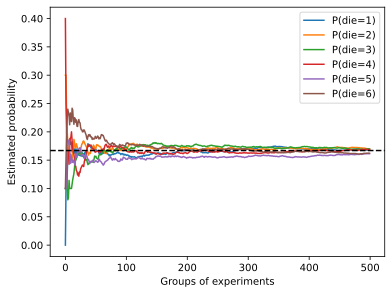

In [5]:
from matplotlib_inline import backend_inline
import matplotlib.pyplot as plt


def set_figsize(figsize=(3.5, 2.5)):
    # 使用svg格式在Jupyter中显示绘图
    backend_inline.set_matplotlib_formats('svg')
    plt.rcParams['figure.figsize'] = figsize


counts = multinomial.Multinomial(10, fair_probs).sample((500,))
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)

set_figsize((6, 4.5))
for i in range(6):
    plt.plot(estimates[:, i].numpy(),
             label=("P(die=" + str(i + 1) + ")"))
plt.axhline(y=0.167, color='black', linestyle='dashed')
plt.gca().set_xlabel('Groups of experiments')
plt.gca().set_ylabel('Estimated probability')
plt.legend()